# Hälsostudie - Inlämningsuppgift, instruktioner:

### Introduktion:
Du är dataanalytiker på ett forskningsinstitut. Du har fått tillgång till data från en hälsostudie här ovanför med information om deltagarnas ålder, kön, vikt, längd, blodtryck, kolesterolnivå, rökvanor och om de har en viss sjukdom. Din uppgift är att analysera datan i Python och presentera dina resultat i en Jupyter Notebook. All kod, grafer och förklaringar ska finnas direkt i notebooken.

## Del 1 - Grundläggande analys och statistik:
#### Beskrivande analys:
- Räkna ut medel, median, min och max för: age, weight, height, systolic_bp, cholesterol.
- Skapa minst 3 olika grafer (t.ex. histogram över blodtryck, boxplot över vikt per kön, stapeldiagram över andelen rökare).

#### Simulering kopplad till caset:
- Beräkna andelen personer i datacaset som har sjukdomen.
- Använd numpy för att simulera 1000 slumpade personer med samma sannolikhet för sjukdom.
- Jämför den simulerade andelen med den verkliga andelen i datasetet.

#### Konfidensintervall:
- Beräkna konfidensintervall för medelvärdet av systolic_bp.

#### Hypotesprövning:
- Testa hypotesen: "Rökare har högre medel-blodtryck än icke-rökare".
- Använd en av metoderna vi gått igenom.
- Förklara kort resultatet i en markdown-ruta.

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../data/health_study_dataset.csv")

print(df.head())

   id  age sex  height  weight  systolic_bp  cholesterol smoker  disease
0   1   57   F   168.9    65.8        141.8         4.58     No        0
1   2   47   M   180.4    95.9        144.8         5.18    Yes        0
2   3   59   F   169.9    82.2        151.7         6.16     No        0
3   4   72   M   157.7    93.1        151.0         6.63     No        0
4   5   46   M   192.6   104.1        144.1         5.21     No        0


## Beskrivande analys - Statistik:
Jag börjar med att räkna ut medel, median, min och max för: age, weight, height, systolic_bp, cholesterol. Den statistiken visas i kodblocket nedan:

In [85]:
variables = ["age", "weight", "height", "systolic_bp", "cholesterol"]

stats = pd.DataFrame({
    "Medel": df[variables].mean(),
    "Median": df[variables].median(),
    "Min": df[variables].min(),
    "Max": df[variables].max()
})

print(stats)

                  Medel  Median    Min     Max
age           49.426250   50.00   18.0   90.00
weight        73.413000   73.20   33.7  114.40
height       171.849250  171.35  144.4  200.40
systolic_bp  149.178625  149.40  106.8  185.90
cholesterol    4.929150    4.97    2.5    7.88


## 3 olika grafer, för att visa statistik:
Jag räknar med de exempelgraferna som står i instruktionen.
### 1. Histogram - Systolic BP:
Jag börjar med att visa fördelningen av systolic bp i visualiseringen nedan i kodblocket:

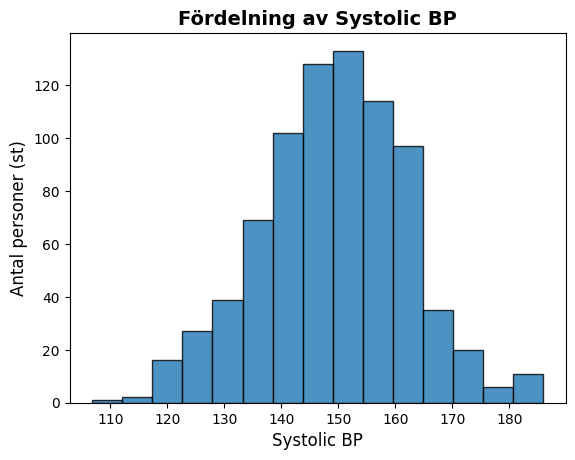

In [86]:
plt.figure()

plt.hist(df["systolic_bp"], bins=15, edgecolor="black", linewidth=1, alpha=0.8)
plt.xlabel("Systolic BP", fontsize=12)
plt.ylabel("Antal personer (st)", fontsize=12)
plt.title("Fördelning av Systolic BP", fontsize=14, fontweight="bold")

plt.show()

### 2. Boxplot - vikt per kön:

<Figure size 640x480 with 0 Axes>

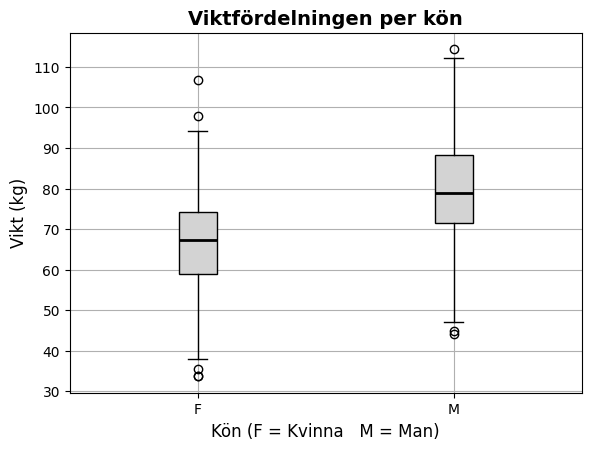

In [87]:
plt.figure()

df.boxplot(
    column="weight", 
    by="sex",
    patch_artist=True,
    boxprops=dict(facecolor="lightgray", edgecolor="black"),
    medianprops=dict(color="black", linewidth=2),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black")
)

plt.xlabel("Kön (F = Kvinna   M = Man)", fontsize=12)
plt.ylabel("Vikt (kg)", fontsize=12)
plt.title("Viktfördelningen per kön", fontsize=14, fontweight="bold")
plt.suptitle("")

plt.show()

### 3. Stapeldiagram - andel rökare:
I figuren nedan visas det andelen rökare och icke-rökare i ett stapeldiagram. Den visar på att andelen rökare är ca 1/4 av alla som deltog i studien.

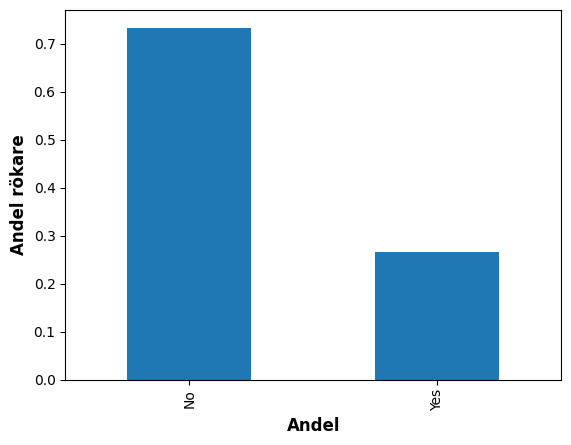

In [88]:
smoker_counts = df["smoker"].value_counts(normalize=True)

plt.figure()

smoker_counts.plot(kind="bar")

plt.xlabel("Andel", fontsize=12, fontweight="bold")
plt.ylabel("Andel rökare", fontsize=12, fontweight="bold")

plt.show()

## Andel personer med sjukdom i datasetet:
Jag beräkna andelen personer i datacaset som har sjukdomen. Dett visas i kodblocket nedan:

- disease = 1 --> positiv (har sjukdomen)
- disease = 0 --> negativ (har INTE sjukdomen)

In [89]:
disease_rate = df["disease"].mean()

print(f"Andel med sjukdomen i datasetet är: {disease_rate:.3f} eller {disease_rate * 100:.1f} %")

Andel med sjukdomen i datasetet är: 0.059 eller 5.9 %


## Simulering med NumPy (1000 slumpade personer):
Jag använder samma sannolikhet som den verkliga datan.

- disease = 1 --> positiv (har sjukdomen)
- disease = 0 --> negativ (har INTE sjukdomen)

In [90]:
np.random.seed(1)

simulated_disease = np.random.binomial(
    n=1,
    p=disease_rate,
    size=1000
)

simulated_rate = simulated_disease.mean()

print(f"Simulerad (1000 st) andel med sjukdomen är : {simulated_rate:.3f} eller {simulated_rate * 100:.1f} %")

Simulerad (1000 st) andel med sjukdomen är : 0.056 eller 5.6 %


## Jämförelse mellan verklig & simulerad:
Vad är skillnaden mellan den verkliga datan och den simulerad slumpade datan? Det visas i kodblocket nedan:

In [91]:
print("Skillnaden mellan verkliga- och simulerad andel med sjukdomen är:", simulated_rate - disease_rate)

Skillnaden mellan verkliga- och simulerad andel med sjukdomen är: -0.0027499999999999955


## Konfidensintervall för medelvärdet av Systolic BP - med normalapproximation:

In [92]:
mean_bp = df["systolic_bp"].mean()
std_bp = df["systolic_bp"].std()
n = len(df)

z = 1.96
margin = z * (std_bp / np.sqrt(n))

ci_lower = mean_bp - margin
ci_upper = mean_bp + margin

print(f"95% Konfidensintervall för systolic bp är: ({ci_lower:.2f}, {ci_upper:.2f})")

95% Konfidensintervall för systolic bp är: (148.29, 150.07)


## Hypotesprövning - Rökare vs Icke-rökare:
Jag ska testa hypotesen: "Rökare har högre medel-blodtryck än icke-rökare". Jag ska alltså undersöka skillnaderna i systolic bp mellan rökare och icke-rökare. Metoden som använts är T-test. Det visas i kodblocket nedan:

In [93]:
from scipy import stats

smokers = df[df["smoker"] == "Yes"]["systolic_bp"]
non_smokers = df[df["smoker"] == "No"]["systolic_bp"]

mean_smokers = smokers.mean()
mean_non_smokers = non_smokers.mean()

print(f"Medel systolic bp för rökare är: {mean_smokers:.2f}")
print(f"Medle systolic bp icke-rökare är: {mean_non_smokers:.2f}")

t_stat, p_value_two_sided = stats.ttest_ind(
    smokers,
    non_smokers,
    equal_var=False
)

p_value_one_sided = p_value_two_sided / 2

print(f"T-statistik: {t_stat:.3f}")
print(f"P-värde (ensidigt): {p_value_one_sided:.4f}")

alpha = 0.05

if p_value_one_sided < alpha and mean_smokers > mean_non_smokers:
    print("Beslut: Förkasta nollhypotesen (H0).")
else:
    print("Beslut: Kan inte förkasta nollhypotesen (H0).")


if p_value_one_sided > alpha:
    print("Slutsats: Det finns statistiskt stöd för att rökare har högre systolic bp än icke-rökare")

else:
    print("Slutsats: Det finns inte tillräckligt statistikt stöd för att rökare har högre systolic bp än icke-rökare")


Medel systolic bp för rökare är: 149.52
Medle systolic bp icke-rökare är: 149.05
T-statistik: 0.450
P-värde (ensidigt): 0.3264
Beslut: Kan inte förkasta nollhypotesen (H0).
Slutsats: Det finns statistiskt stöd för att rökare har högre systolic bp än icke-rökare


### Hypotesprövning - Resultat:
Jag utförde ett ensidigt tvåstickprovs t-test för att undersöka om rökare har högre systolic bp än icke-rökare. Resultatet visade hypotesen var rätt, medelvärdet för systolic bp var högre hos rökare. Det erhållna p-värdet jämfördes med signifikansnivån 0,05. Baserat på testet finns det statistiskt stöd för att rökare har högre systolic bp än icke-rökare.